In [9]:
import numpy as np
from scipy.stats import f, norm
from scipy.special import beta
import matplotlib.pyplot as plt

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

##           Fisher's distribution Wiki - https://en.wikipedia.org/wiki/F-distribution

_d1, d2 > 0 deg. of freedom_

In [10]:
d1, d2 = 29., 18.

__Probability density function__ : 
${\displaystyle {\frac {\sqrt {\frac {(d_{1}\,x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}\,x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\!}$

In [11]:
def pdf(x, d1, d2):
    return np.sqrt(np.float64((pow(d1 * x, d1) * pow(d2, d2)) / (pow(d1 * x + d2, d1 + d2)))) / (x * beta(d1 / 2, d2 / 2))

__Mean__ : ${\frac  {d_{2}}{d_{2}-2}}\!$
_for d2 > 2_

In [12]:
mean = d2 / (d2 - 2)

__Variance__ : ${\frac  {2\,d_{2}^{2}\,(d_{1}+d_{2}-2)}{d_{1}(d_{2}-2)^{2}(d_{2}-4)}}\!$ _for d2 > 4_

In [13]:
variance = (2 * pow(d2, 2) * (d1 + d2 - 2)) / (d1 * pow((d2 - 2), 2) * (d2 - 4))

__Samples sizes__ : 

In [14]:
n = [5, 10, 20, 40]

_2. Cгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения._


n = 5 sample mean: 1.124 nd parameters: M(x) = 1.125 and D(x) = 0.056
n = 10 sample mean: 1.129 nd parameters: M(x) = 1.125 and D(x) = 0.028
n = 20 sample mean: 1.125 nd parameters: M(x) = 1.125 and D(x) = 0.014
n = 40 sample mean: 1.128 nd parameters: M(x) = 1.125 and D(x) = 0.007


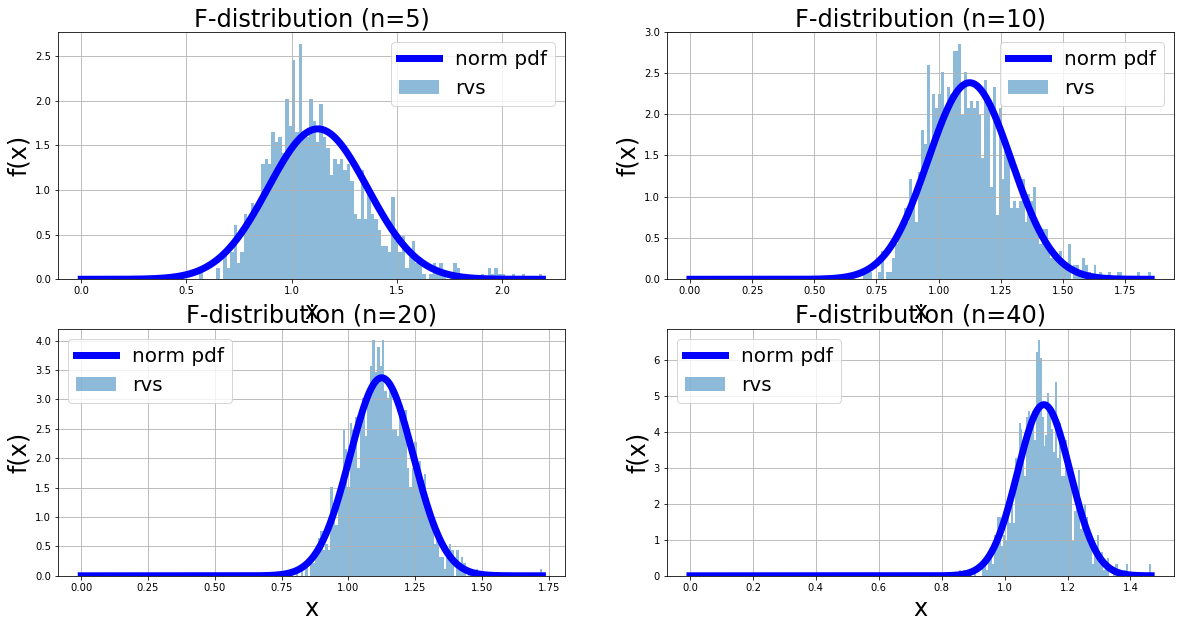

In [15]:
fig = plt.figure(figsize=(20, 10))


def _plot(ax, sample, i):
    # average of each sample -> for hist
    average = np.average(np.array(sample).reshape((1000, i)), axis=1, weights=[1, ] * i)
    print(f"n = {i} sample mean: {round(average.mean(), 3)} nd parameters: M(x) = {mean} and D(x) = {round(variance / i, 3)}")


    # normal probability density -> plot
    norm_rv = norm(loc=mean, scale=np.sqrt(variance / i))
    x = np.linspace(0, average.max(), 1000)

    # plot normal pdf
    ax.plot(x, norm_rv.pdf(x), color="blue", linewidth=7.0, label="norm pdf")
    ax.hist(average, int(len(sample) / 10), density=True, alpha=0.5, label="rvs")

    # styling
    ax.set_xlabel("x", {'size': 24})
    ax.set_ylabel("f(x)", {'size': 24})
    ax.set_title(f"F-distribution (n={i})", {'size': 24})
    plt.legend(fontsize=20, frameon=True)
    ax.grid()


# generate random variates. F-distribution
samples = ([f.rvs(d1, d2, size=i) for _ in range(1000)] for i in n)
samp = iter(samples)
for enum, i in enumerate(n):
    # new subplot (enum + 1 for title number)
    ax = fig.add_subplot(2, 2, enum + 1)
    # plot each sample
    _plot(ax, next(samp), i)

plt.show()

__Вывод :__ _Какова бы ни была форма распределения генеральной совокупности, выборочное распределение стремится к нормальному, а его дисперсия задается центральной предельной теоремой._

_1. Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины._

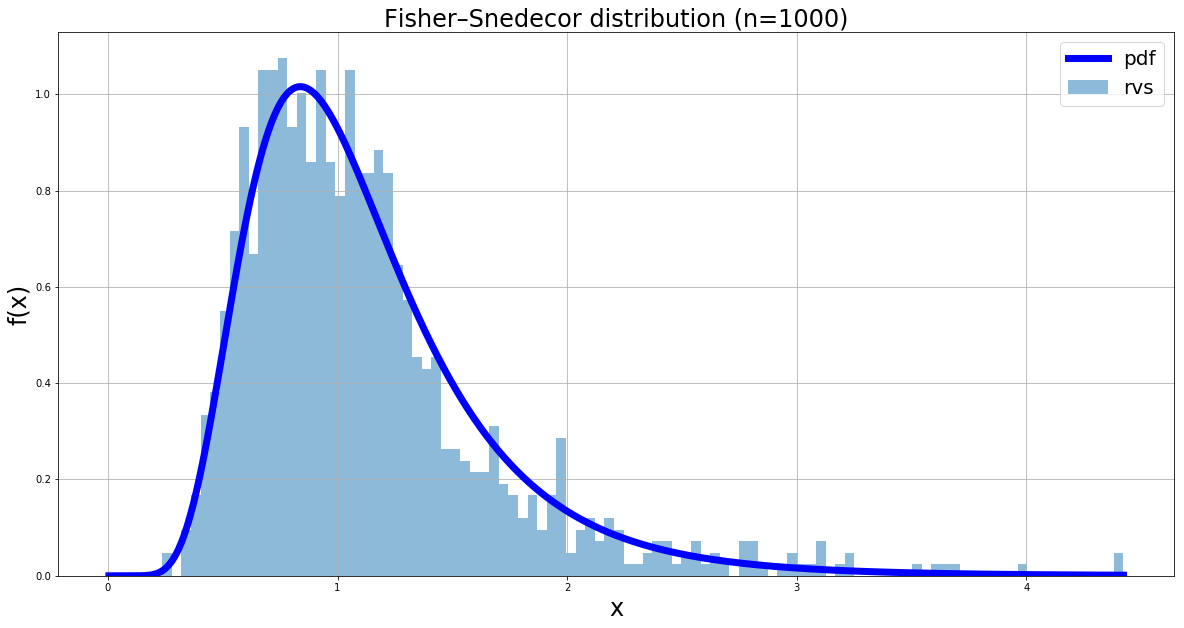

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

# generate random variates. F-distribution
rv = f(d1, d2)
sample = rv.rvs(size=1000)
x = np.linspace(0, sample.max(), 1000)

# plotting F-distribution's pdf
ax.plot(x, pdf(x, d1, d2), color="blue", linewidth=7.0, label="pdf")
ax.hist(sample, int(len(sample) / 10), density=True, alpha=0.5, label="rvs")

# styling
ax.set_xlabel("x", {'size': 24})
ax.set_ylabel("f(x)", {'size': 24})
ax.set_title("Fisher–Snedecor distribution (n=1000)", {'size': 24})
plt.legend(fontsize=20, frameon=True)
ax.grid()
plt.show()

## Thank you for checking my work